In [1]:
from astropy.table import Table

import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
H_0 = 100      # Hubble's Constant in units of h km/s/Mpc
c = 299792.458 # Speed of light in units of km/s

# Data

In [4]:
data_filename = '../spirals/DRP-master_file_vflag_BB_smooth1p85_mapFit_N2O2_HIdr2_noWords_v5.txt'

data = Table.read(data_filename, format='ascii.commented_header')

In [5]:
kias_filename = '/Users/kellydouglass/Documents/Research/data/kias1033_5_MPAJHU_ZdustOS_HI100_NSAv012_CMDJan2020.txt'

kias = Table.read(kias_filename, format='ascii.commented_header')

In [6]:
bad_boolean = np.logical_or.reduce([data['M90_map'] == -99, 
                                    data['M90_disk_map'] == -99, 
                                    data['alpha_map'] > 99, 
                                    data['ba_map'] > 0.998])

good_galaxies = data[~bad_boolean]

print(len(good_galaxies))

2739


In [9]:
good_galaxies[20:30]

<Table length=10>
MaNGA_plate MaNGA_IFU NSA_plate NSA_fiberID ...   imc     aimc     cd  
   int64      int64     int64      int64    ... float64 float64 float64
----------- --------- --------- ----------- ... ------- ------- -------
       8456     12705       942         597 ...    -1.0    -1.0    -1.0
       8456     12702       942         526 ...     2.0  131.26  -0.046
       8991      6103      1015          14 ...     1.0     1.0  -0.136
       8455      3701      1428         561 ...     2.0   69.32  -0.204
       8990     12704       967         422 ...     2.0   19.25  -0.259
       8241      9101      2273         144 ...     2.0   25.97  -0.251
       8987      6102      1935         375 ...     2.0   27.31  -0.027
       8454     12701      1358         335 ...     2.0   94.83  -0.057
       7815      6103       728         364 ...     2.0   37.66  -0.264
       8984      6101      2245         332 ...     2.0   39.58  -0.201

### Calculate $R_{90}$ in kpc

In [10]:
dist_to_galaxy_Mpc = c*good_galaxies['NSA_redshift']/H_0
dist_to_galaxy_kpc = dist_to_galaxy_Mpc*1000

good_galaxies['R90_kpc'] = dist_to_galaxy_kpc*np.tan(good_galaxies['NSA_elpetro_th90']*(1./60)*(1./60)*(np.pi/180))

In [11]:
HI_boolean = np.logical_or(good_galaxies['logHI'] == -99, good_galaxies['logHI'] == -999)

goodHI_galaxies = good_galaxies[~HI_boolean]

print(len(goodHI_galaxies))

1225


### Calculate mass ratios

In [12]:
good_galaxies['M90_Mdisk_ratio'] = 10**(good_galaxies['M90_map'] - good_galaxies['M90_disk_map'])
goodHI_galaxies['M90_Mdisk_ratio'] = 10**(goodHI_galaxies['M90_map'] - goodHI_galaxies['M90_disk_map'])

goodHI_galaxies['M90_MdiskHI_ratio'] = 10**goodHI_galaxies['M90_map']/(10**goodHI_galaxies['M90_disk_map'] + 10**goodHI_galaxies['logHI'])

goodHI_galaxies['M90_vis'] = np.log10(10**goodHI_galaxies['M90_disk_map'] + 10**goodHI_galaxies['logHI'])

### Separate by CMD classification

In [13]:
BC_boolean = good_galaxies['CMD_class'] == 1
GV_boolean = good_galaxies['CMD_class'] == 2
RS_boolean = good_galaxies['CMD_class'] == 3

BC = good_galaxies[BC_boolean]
GV = good_galaxies[GV_boolean]
RS = good_galaxies[RS_boolean]

print('Blue cloud:', len(BC), np.sum(BC['M90_Mdisk_ratio'] < 20))
print('Green valley:', len(GV), np.sum(GV['M90_Mdisk_ratio'] < 20))
print('Red sequence:', len(RS), np.sum(RS['M90_Mdisk_ratio'] < 20))

Blue cloud: 1361 1115
Green valley: 678 587
Red sequence: 448 386


In [14]:
BC_HI_boolean = goodHI_galaxies['CMD_class'] == 1
GV_HI_boolean = goodHI_galaxies['CMD_class'] == 2
RS_HI_boolean = goodHI_galaxies['CMD_class'] == 3

BC_HI = goodHI_galaxies[BC_HI_boolean]
GV_HI = goodHI_galaxies[GV_HI_boolean]
RS_HI = goodHI_galaxies[RS_HI_boolean]

print('Blue cloud:', len(BC_HI))
print('Green valley:', len(GV_HI))
print('Red sequence:', len(RS_HI))

Blue cloud: 789
Green valley: 212
Red sequence: 92


In [15]:
kias_BC_boolean = kias['CMD_class'] == 1
kias_GV_boolean = kias['CMD_class'] == 2
kias_RS_boolean = kias['CMD_class'] == 3

kias_BC = kias[kias_BC_boolean]
kias_GV = kias[kias_GV_boolean]
kias_RS = kias[kias_RS_boolean]

# Sample stats
## Median values

In [16]:
print('Blue cloud:', np.median(BC['M90_Mdisk_ratio']))
print('Green valley:', np.median(GV['M90_Mdisk_ratio']))
print('Red sequence:', np.median(RS['M90_Mdisk_ratio']))

Blue cloud: 5.517179143891052
Green valley: 4.490391518195709
Red sequence: 4.684900777684556


In [17]:
print('Blue cloud:', np.median(BC_HI['M90_MdiskHI_ratio']))
print('Green valley:', np.median(GV_HI['M90_MdiskHI_ratio']))
print('Red sequence:', np.median(RS_HI['M90_MdiskHI_ratio']))

Blue cloud: 3.405801535625517
Green valley: 3.2256655550832454
Red sequence: 3.0853152064545393


# Distribution over $R_\text{max}$ and $R_{90}$

<IPython.core.display.Javascript object>


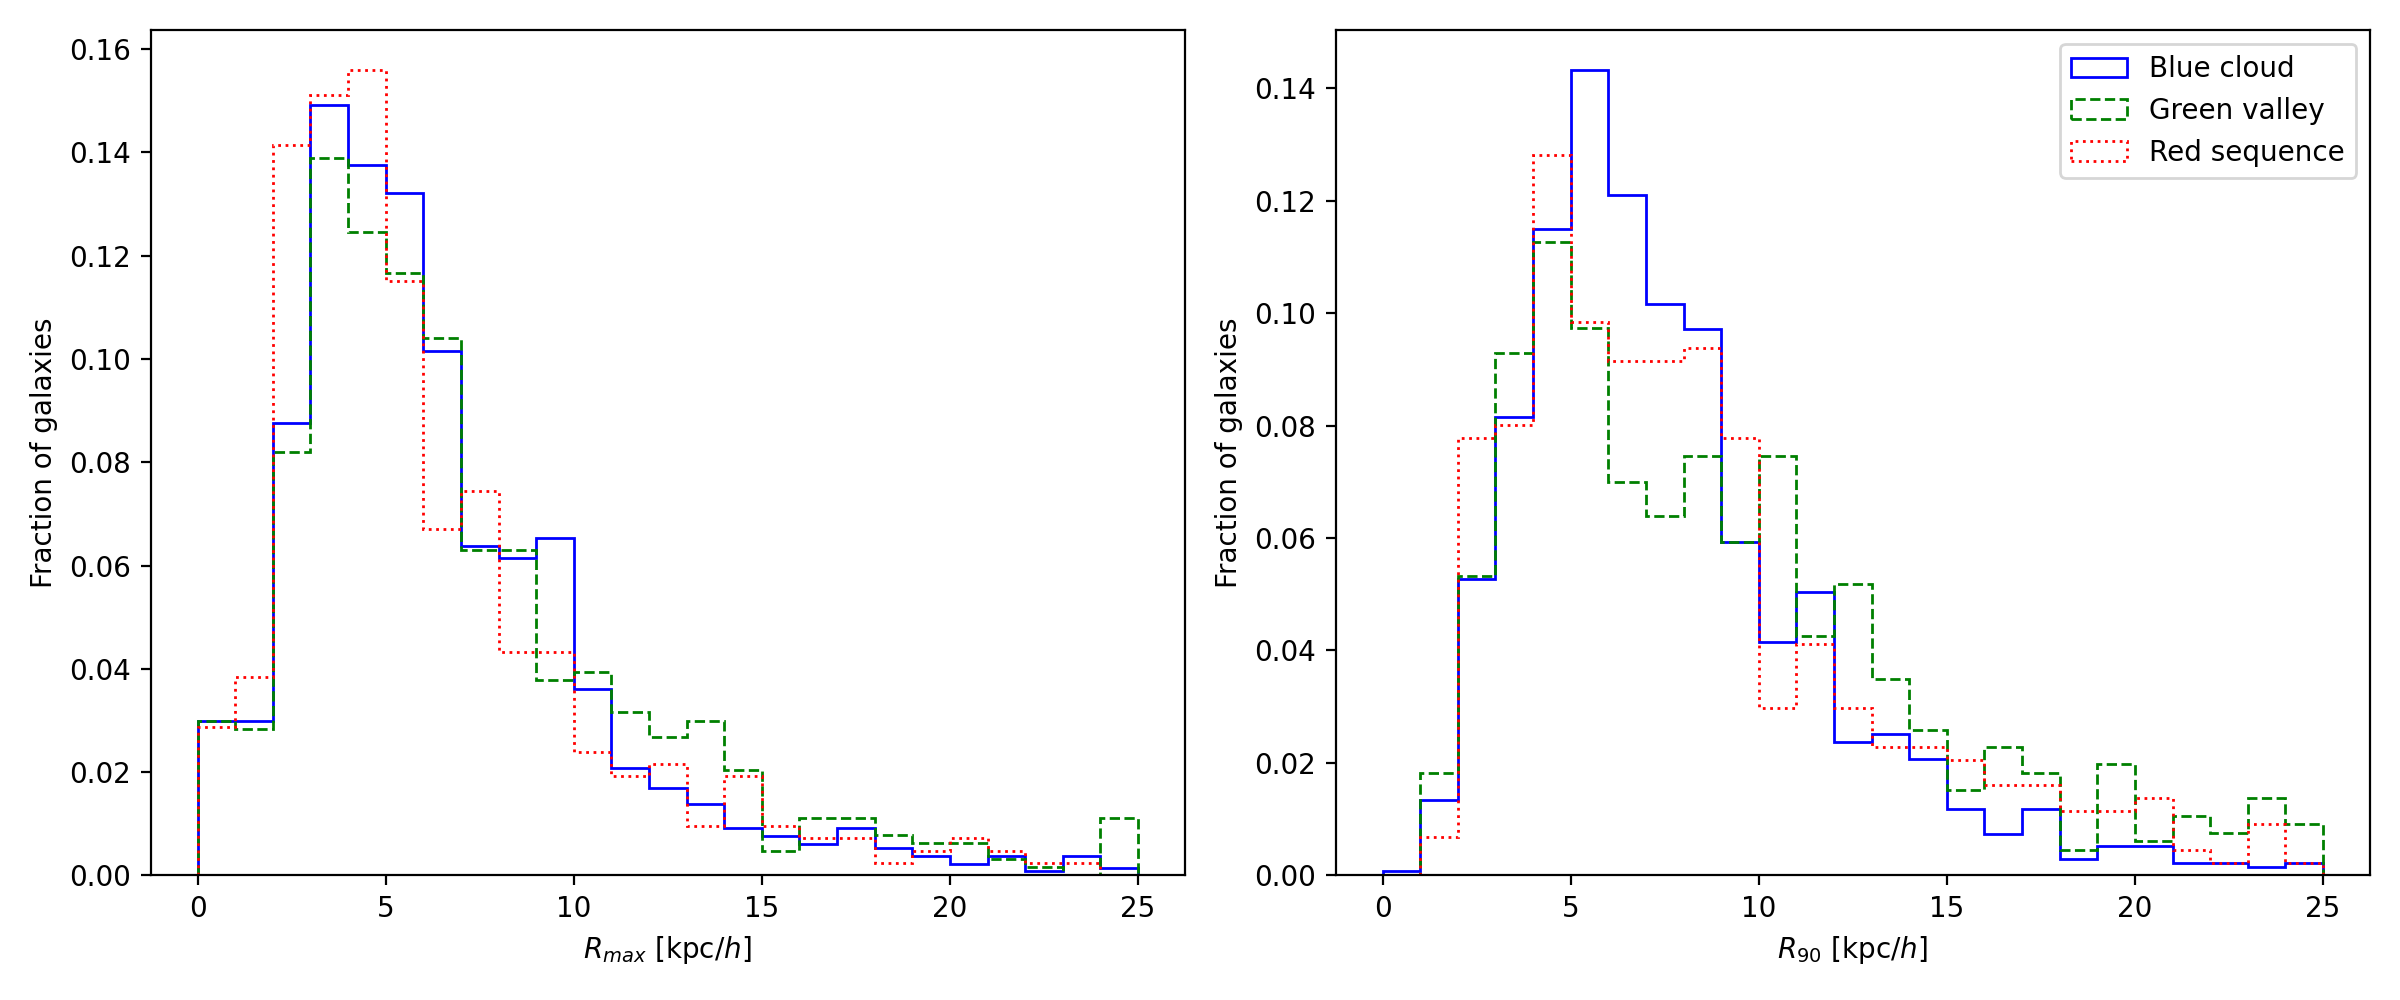

In [21]:
Rmax_bins = np.arange(0,26,1)

plt.figure(figsize=(12,5))



plt.subplot(121)

plt.hist(BC['Rmax'], bins=Rmax_bins, density=True, histtype='step', color='b', label='Blue cloud')
plt.hist(GV['Rmax'], bins=Rmax_bins, density=True, histtype='step', color='g', linestyle='--', label='Green valley')
plt.hist(RS['Rmax'], bins=Rmax_bins, density=True, histtype='step', color='r', linestyle=':', label='Red sequence')

plt.xlabel('$R_{max}$ [kpc/$h$]')
plt.ylabel('Fraction of galaxies')



plt.subplot(122)

plt.hist(BC['R90_kpc'], bins=Rmax_bins, density=True, histtype='step', color='b', label='Blue cloud')
plt.hist(GV['R90_kpc'], bins=Rmax_bins, density=True, histtype='step', color='g', linestyle='--', label='Green valley')
plt.hist(RS['R90_kpc'], bins=Rmax_bins, density=True, histtype='step', color='r', linestyle=':', label='Red sequence')

plt.xlabel('$R_{90}$ [kpc/$h$]')
plt.ylabel('Fraction of galaxies')

plt.legend()

plt.tight_layout();

# Sample rotation curves

In [22]:
radii_max = np.linspace(0,1,50)

<IPython.core.display.Javascript object>


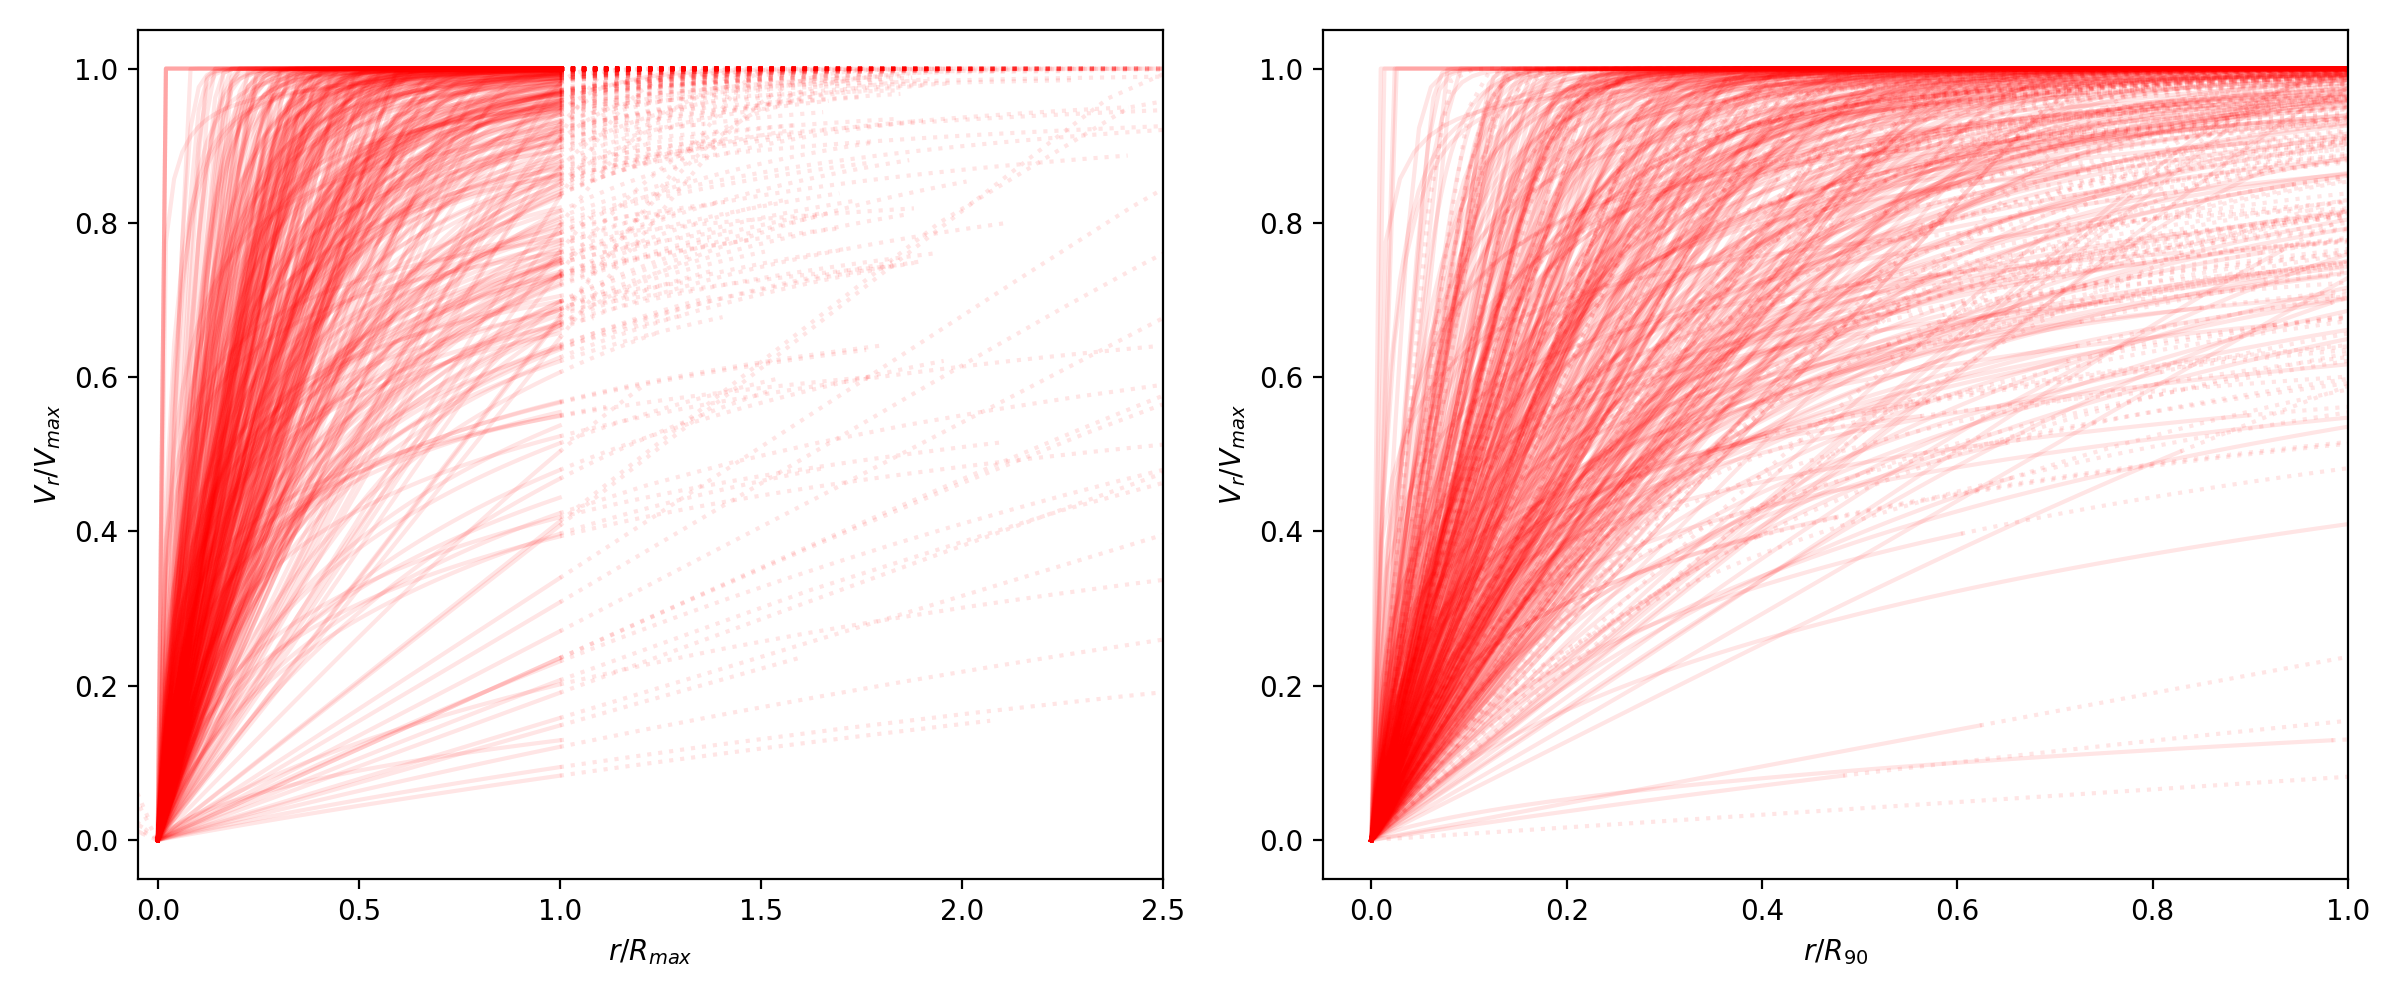

<ipython-input-30-1b2fb59798ac>:12: RuntimeWarning: invalid value encountered in power
  Vr_max = radii_max*Rmax/(Rturn**alpha + (radii_max*Rmax)**alpha)**(1/alpha)
<ipython-input-30-1b2fb59798ac>:18: RuntimeWarning: invalid value encountered in power
  Vr_90 = radii_90*Rmax/(Rturn**alpha + (radii_90*Rmax)**alpha)**(1/alpha)
<ipython-input-30-1b2fb59798ac>:12: RuntimeWarning: invalid value encountered in power
  Vr_max = radii_max*Rmax/(Rturn**alpha + (radii_max*Rmax)**alpha)**(1/alpha)
<ipython-input-30-1b2fb59798ac>:18: RuntimeWarning: invalid value encountered in power
  Vr_90 = radii_90*Rmax/(Rturn**alpha + (radii_90*Rmax)**alpha)**(1/alpha)
<ipython-input-30-1b2fb59798ac>:12: RuntimeWarning: invalid value encountered in power
  Vr_max = radii_max*Rmax/(Rturn**alpha + (radii_max*Rmax)**alpha)**(1/alpha)
<ipython-input-30-1b2fb59798ac>:18: RuntimeWarning: invalid value encountered in power
  Vr_90 = radii_90*Rmax/(Rturn**alpha + (radii_90*Rmax)**alpha)**(1/alpha)
<ipython-input-30-1

<ipython-input-30-1b2fb59798ac>:38: RuntimeWarning: invalid value encountered in power
  Vr_max = r_Rmax*R90/(Rturn**alpha + (r_Rmax*R90)**alpha)**(1/alpha)
<ipython-input-30-1b2fb59798ac>:44: RuntimeWarning: invalid value encountered in power
  Vr_90 = r_R90*R90/(Rturn**alpha + (r_R90*R90)**alpha)**(1/alpha)
<ipython-input-30-1b2fb59798ac>:38: RuntimeWarning: invalid value encountered in power
  Vr_max = r_Rmax*R90/(Rturn**alpha + (r_Rmax*R90)**alpha)**(1/alpha)
<ipython-input-30-1b2fb59798ac>:44: RuntimeWarning: invalid value encountered in power
  Vr_90 = r_R90*R90/(Rturn**alpha + (r_R90*R90)**alpha)**(1/alpha)
<ipython-input-30-1b2fb59798ac>:38: RuntimeWarning: invalid value encountered in power
  Vr_max = r_Rmax*R90/(Rturn**alpha + (r_Rmax*R90)**alpha)**(1/alpha)
<ipython-input-30-1b2fb59798ac>:44: RuntimeWarning: invalid value encountered in power
  Vr_90 = r_R90*R90/(Rturn**alpha + (r_R90*R90)**alpha)**(1/alpha)
<ipython-input-30-1b2fb59798ac>:38: RuntimeWarning: invalid value e

In [30]:
plt.figure(figsize=(12,5))


plt.subplot(121)

for i in range(len(RS)):
    alpha = RS['alpha_map'][i]
    Rturn = RS['Rturn_map'][i]
    Rmax = RS['Rmax'][i]
    R90 = RS['R90_kpc'][i]
    
    Vr_max = radii_max*Rmax/(Rturn**alpha + (radii_max*Rmax)**alpha)**(1/alpha)
    
    plt.plot(radii_max, Vr_max, 'r', alpha=0.1)
    
    if R90 > Rmax:
        radii_90 = np.linspace(1,R90/Rmax,50)
        Vr_90 = radii_90*Rmax/(Rturn**alpha + (radii_90*Rmax)**alpha)**(1/alpha)
        plt.plot(radii_90, Vr_90, 'r:', alpha=0.1)

plt.xlim([-0.05, 2.5])

plt.xlabel('$r/R_{max}$')
plt.ylabel('$V_r/V_{max}$')



plt.subplot(122)

for i in range(len(RS)):
    alpha = RS['alpha_map'][i]
    Rturn = RS['Rturn_map'][i]
    Rmax = RS['Rmax'][i]
    R90 = RS['R90_kpc'][i]
    
    r_Rmax = np.linspace(0,Rmax/R90,50)
    
    Vr_max = r_Rmax*R90/(Rturn**alpha + (r_Rmax*R90)**alpha)**(1/alpha)
    
    plt.plot(r_Rmax, Vr_max, 'r', alpha=0.1)
    
    if R90 > Rmax:
        r_R90 = np.linspace(Rmax/R90,1,50)
        Vr_90 = r_R90*R90/(Rturn**alpha + (r_R90*R90)**alpha)**(1/alpha)
        plt.plot(r_R90, Vr_90, 'r:', alpha=0.1)


plt.xlim([-0.05, 1])

plt.xlabel('$r/R_{90}$')
plt.ylabel('$V_r/V_{max}$')

plt.tight_layout();

<IPython.core.display.Javascript object>


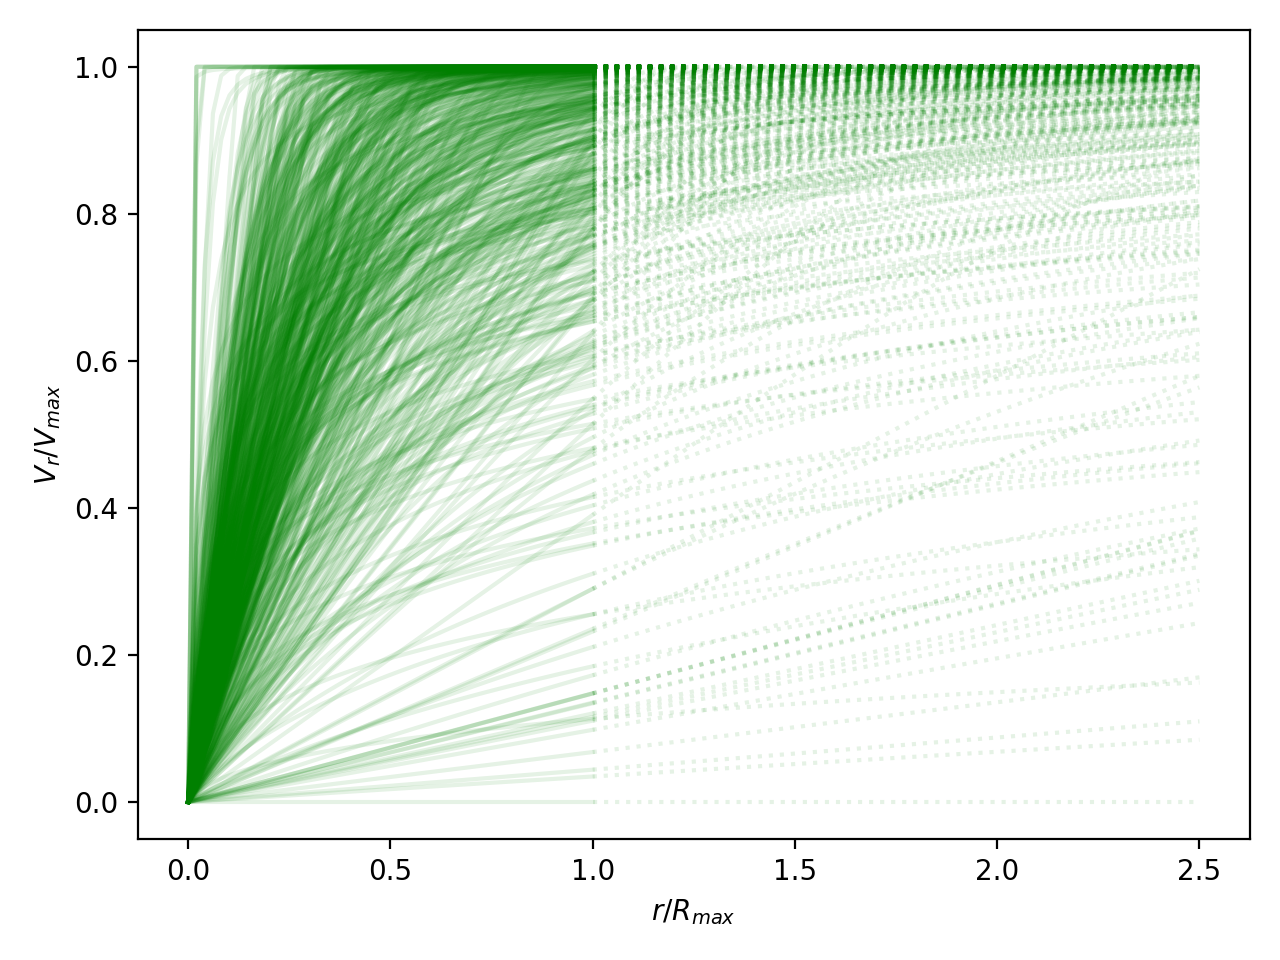

<ipython-input-14-08ca3be67820>:8: RuntimeWarning: invalid value encountered in power
  Vr_max = radii_max*Rmax/(Rturn**alpha + (radii_max*Rmax)**alpha)**(1/alpha)
<ipython-input-14-08ca3be67820>:9: RuntimeWarning: invalid value encountered in power
  Vr_90 = radii_90*Rmax/(Rturn**alpha + (radii_90*Rmax)**alpha)**(1/alpha)
<ipython-input-14-08ca3be67820>:8: RuntimeWarning: invalid value encountered in power
  Vr_max = radii_max*Rmax/(Rturn**alpha + (radii_max*Rmax)**alpha)**(1/alpha)
<ipython-input-14-08ca3be67820>:9: RuntimeWarning: invalid value encountered in power
  Vr_90 = radii_90*Rmax/(Rturn**alpha + (radii_90*Rmax)**alpha)**(1/alpha)
<ipython-input-14-08ca3be67820>:8: RuntimeWarning: invalid value encountered in power
  Vr_max = radii_max*Rmax/(Rturn**alpha + (radii_max*Rmax)**alpha)**(1/alpha)
<ipython-input-14-08ca3be67820>:9: RuntimeWarning: invalid value encountered in power
  Vr_90 = radii_90*Rmax/(Rturn**alpha + (radii_90*Rmax)**alpha)**(1/alpha)
<ipython-input-14-08ca3be

<ipython-input-14-08ca3be67820>:8: RuntimeWarning: invalid value encountered in power
  Vr_max = radii_max*Rmax/(Rturn**alpha + (radii_max*Rmax)**alpha)**(1/alpha)
<ipython-input-14-08ca3be67820>:9: RuntimeWarning: invalid value encountered in power
  Vr_90 = radii_90*Rmax/(Rturn**alpha + (radii_90*Rmax)**alpha)**(1/alpha)


In [14]:
plt.figure()

for i in range(len(GV)):
    alpha = GV['alpha_map'][i]
    Rturn = GV['Rturn_map'][i]
    Rmax = GV['Rmax'][i]
    
    Vr_max = radii_max*Rmax/(Rturn**alpha + (radii_max*Rmax)**alpha)**(1/alpha)
    Vr_90 = radii_90*Rmax/(Rturn**alpha + (radii_90*Rmax)**alpha)**(1/alpha)
    
    plt.plot(radii_max, Vr_max, 'g', alpha=0.1)
    plt.plot(radii_90, Vr_90, 'g:', alpha=0.1)
    
plt.xlabel('$r/R_{max}$')
plt.ylabel('$V_r/V_{max}$')

plt.tight_layout();

<IPython.core.display.Javascript object>


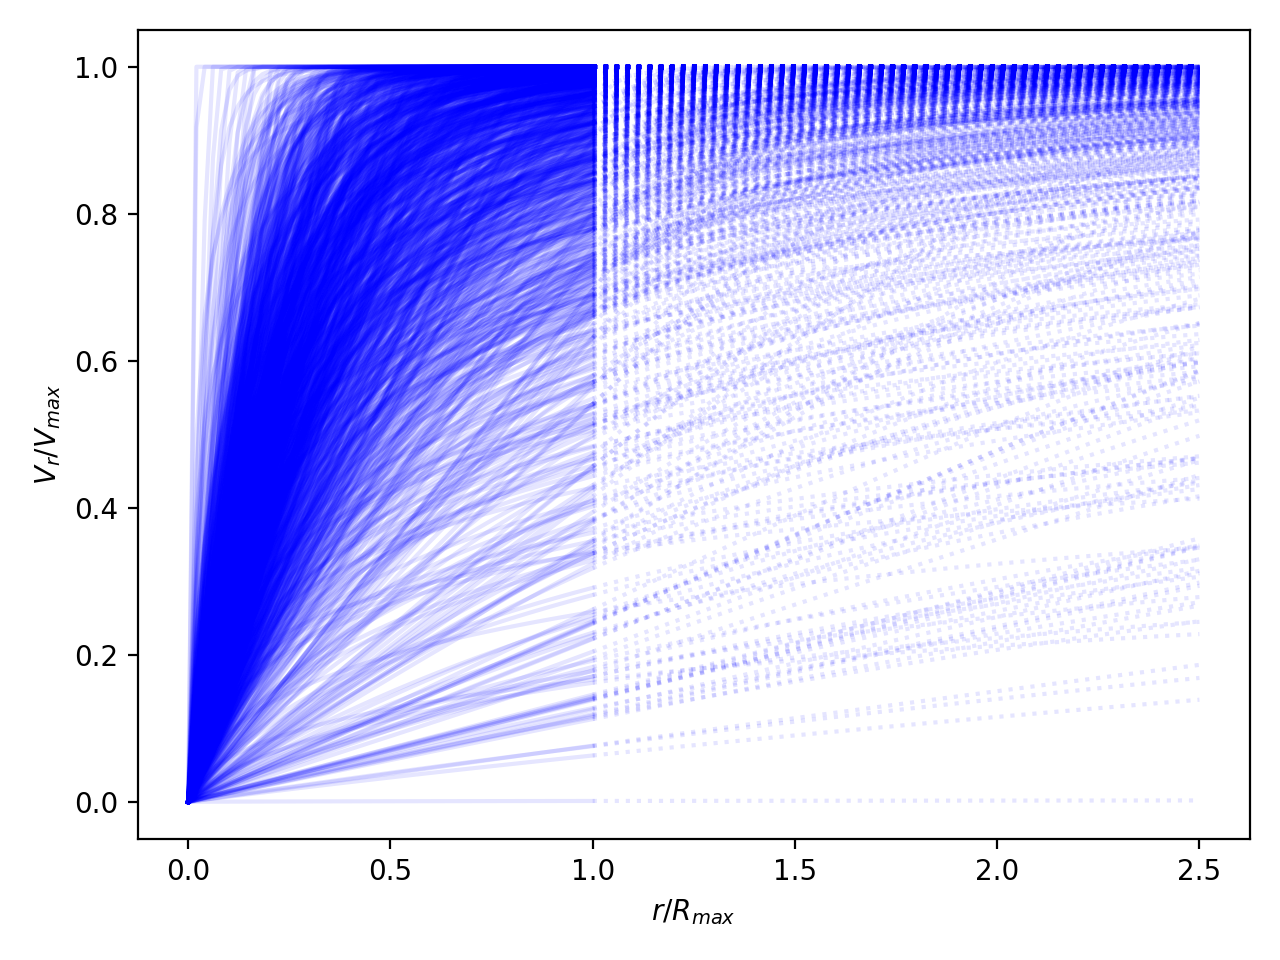

<ipython-input-52-8b6ed9cbd1bb>:8: RuntimeWarning: invalid value encountered in power
  Vr_max = radii_max*Rmax/(Rturn**alpha + (radii_max*Rmax)**alpha)**(1/alpha)
<ipython-input-52-8b6ed9cbd1bb>:9: RuntimeWarning: invalid value encountered in power
  Vr_90 = radii_90*Rmax/(Rturn**alpha + (radii_90*Rmax)**alpha)**(1/alpha)
<ipython-input-52-8b6ed9cbd1bb>:8: RuntimeWarning: invalid value encountered in power
  Vr_max = radii_max*Rmax/(Rturn**alpha + (radii_max*Rmax)**alpha)**(1/alpha)
<ipython-input-52-8b6ed9cbd1bb>:9: RuntimeWarning: invalid value encountered in power
  Vr_90 = radii_90*Rmax/(Rturn**alpha + (radii_90*Rmax)**alpha)**(1/alpha)
<ipython-input-52-8b6ed9cbd1bb>:8: RuntimeWarning: invalid value encountered in power
  Vr_max = radii_max*Rmax/(Rturn**alpha + (radii_max*Rmax)**alpha)**(1/alpha)
<ipython-input-52-8b6ed9cbd1bb>:9: RuntimeWarning: invalid value encountered in power
  Vr_90 = radii_90*Rmax/(Rturn**alpha + (radii_90*Rmax)**alpha)**(1/alpha)
<ipython-input-52-8b6ed9c

<ipython-input-52-8b6ed9cbd1bb>:8: RuntimeWarning: invalid value encountered in power
  Vr_max = radii_max*Rmax/(Rturn**alpha + (radii_max*Rmax)**alpha)**(1/alpha)
<ipython-input-52-8b6ed9cbd1bb>:9: RuntimeWarning: invalid value encountered in power
  Vr_90 = radii_90*Rmax/(Rturn**alpha + (radii_90*Rmax)**alpha)**(1/alpha)
<ipython-input-52-8b6ed9cbd1bb>:8: RuntimeWarning: invalid value encountered in power
  Vr_max = radii_max*Rmax/(Rturn**alpha + (radii_max*Rmax)**alpha)**(1/alpha)
<ipython-input-52-8b6ed9cbd1bb>:9: RuntimeWarning: invalid value encountered in power
  Vr_90 = radii_90*Rmax/(Rturn**alpha + (radii_90*Rmax)**alpha)**(1/alpha)
<ipython-input-52-8b6ed9cbd1bb>:8: RuntimeWarning: invalid value encountered in power
  Vr_max = radii_max*Rmax/(Rturn**alpha + (radii_max*Rmax)**alpha)**(1/alpha)
<ipython-input-52-8b6ed9cbd1bb>:9: RuntimeWarning: invalid value encountered in power
  Vr_90 = radii_90*Rmax/(Rturn**alpha + (radii_90*Rmax)**alpha)**(1/alpha)
<ipython-input-52-8b6ed9c

In [52]:
plt.figure()

for i in range(len(BC)):
    alpha = BC['alpha_map'][i]
    Rturn = BC['Rturn_map'][i]
    Rmax = BC['Rmax'][i]
    
    Vr_max = radii_max*Rmax/(Rturn**alpha + (radii_max*Rmax)**alpha)**(1/alpha)
    Vr_90 = radii_90*Rmax/(Rturn**alpha + (radii_90*Rmax)**alpha)**(1/alpha)
    
    plt.plot(radii_max, Vr_max, 'b', alpha=0.1)
    plt.plot(radii_90, Vr_90, 'b:', alpha=0.1)
    
plt.xlabel('$r/R_{max}$')
plt.ylabel('$V_r/V_{max}$')

plt.tight_layout();

# Relationship between $M_*$ and $M_\text{tot}$

In [31]:
def bin_median(data, bin_quantity, bins, median_quantity):
    '''
    Calculate the median value of the quantity median_quantity when the objects in 
    data are binned by bin_quanitity.
    
    
    PARAMETERS
    ==========
    
    data : astropy table
        Galaxy data
        
    bin_quantity : string
        Name of column in data by which to bin the data
        
    bins : ndarray of shape (n,)
        Array of bin edges
        
    median_quantity : string
        Name of column in data for which to calculate the median once the data is 
        binned
        
        
    RETURNS
    =======
    
    binned_data : ndarray of shape (n,)
        Median values of median_quantity for each bin of bin_quantity
        
    binned_err : ndarray of shape (n,)
        Statistical uncertainty in each bin (1/sqrt(N), where N is the number of 
        objects in the bin)
    '''
    
    if bin_quantity in ['Mstar', 'NSA_Mstar', 'Mstar_NSA']:
        bin_indices = np.digitize(np.log10(data[bin_quantity]), bins)
    else:
        bin_indices = np.digitize(data[bin_quantity], bins)
    
    n_bins = len(bins)
    
    binned_median = np.zeros(n_bins)
    binned_err = np.zeros(n_bins)
    
    for i in range(n_bins):
        # Find galaxies in this bin
        gal_in_bin = bin_indices == i
        
        # Calculate median of galaxies in bin
        if median_quantity in ['Mstar', 'NSA_Mstar', 'Mtot', 'Mstar_NSA']:
            binned_median[i] = np.log10(np.nanmedian(data[median_quantity][gal_in_bin]))
        elif median_quantity in ['M90_map', 'logHI']:
            binned_median[i] = np.log10(np.nanmedian(10**data[median_quantity][gal_in_bin]))
        else:
            binned_median[i] = np.nanmedian(data[median_quantity][gal_in_bin])
        
        # Calculate statistical uncertainty in bin
        binned_err[i] = 1/np.sqrt(sum(gal_in_bin))
        
    return binned_median, binned_err

In [32]:
Mdisk_bins = np.linspace(9,12,9)
Mdisk_bin_width = Mdisk_bins[1] - Mdisk_bins[0]

BC_M90_medians, BC_M90_errs = bin_median(BC, 'M90_disk_map', Mdisk_bins, 'M90_map')
GV_M90_medians, GV_M90_errs = bin_median(GV, 'M90_disk_map', Mdisk_bins, 'M90_map')
RS_M90_medians, RS_M90_errs = bin_median(RS, 'M90_disk_map', Mdisk_bins, 'M90_map')

/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
<ipython-input-31-c68f859239fb>:58: RuntimeWarning: divide by zero encountered in double_scalars
  binned_err[i] = 1/np.sqrt(sum(gal_in_bin))


In [34]:
plt.figure()

################################################################################
# Stellar mass from stellar density map
#-------------------------------------------------------------------------------
plt.plot(BC['M90_disk_map'], BC['M90_map'], 'bs', markersize=2, alpha=0.2, label='Blue cloud')
plt.plot(GV['M90_disk_map'], GV['M90_map'], 'g^', markersize=2, alpha=0.2, label='Green valley')
plt.plot(RS['M90_disk_map'], RS['M90_map'], 'rv', markersize=2, alpha=0.2, label='Red sequence')

plt.errorbar(Mdisk_bins + 0.5*Mdisk_bin_width, BC_M90_medians, 
             xerr=0.5*Mdisk_bin_width, yerr=BC_M90_errs, 
             c='b', fmt='s')
plt.errorbar(Mdisk_bins + 0.5*Mdisk_bin_width, GV_M90_medians, 
             xerr=0.5*Mdisk_bin_width, yerr=GV_M90_errs, 
             c='g', fmt='^')
plt.errorbar(Mdisk_bins + 0.5*Mdisk_bin_width, RS_M90_medians, 
             xerr=0.5*Mdisk_bin_width, yerr=RS_M90_errs, 
             c='r', fmt='v')

plt.xlabel('log($M_{90, disk}/M_\odot$)')
plt.ylabel('log($M_{90}/M_\odot$)')

plt.xlim([9,12])
plt.ylim([9,13])

plt.legend();
################################################################################

<IPython.core.display.Javascript object>

# Relationship between $M_*$ and $M_{HI}$

In [35]:
BC_HI_medians, BC_HI_errs = bin_median(BC_HI, 'M90_disk_map', Mdisk_bins, 'logHI')
GV_HI_medians, GV_HI_errs = bin_median(GV_HI, 'M90_disk_map', Mdisk_bins, 'logHI')
RS_HI_medians, RS_HI_errs = bin_median(RS_HI, 'M90_disk_map', Mdisk_bins, 'logHI')

kias_BC_NSA_HI_medians, kias_BC_NSA_HI_errs = bin_median(kias_BC, 'Mstar_NSA', Mdisk_bins, 'HImass')
kias_GV_NSA_HI_medians, kias_GV_NSA_HI_errs = bin_median(kias_GV, 'Mstar_NSA', Mdisk_bins, 'HImass')
kias_RS_NSA_HI_medians, kias_RS_NSA_HI_errs = bin_median(kias_RS, 'Mstar_NSA', Mdisk_bins, 'HImass')

/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
<ipython-input-31-c68f859239fb>:58: RuntimeWarning: divide by zero encountered in double_scalars
  binned_err[i] = 1/np.sqrt(sum(gal_in_bin))
/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


<IPython.core.display.Javascript object>


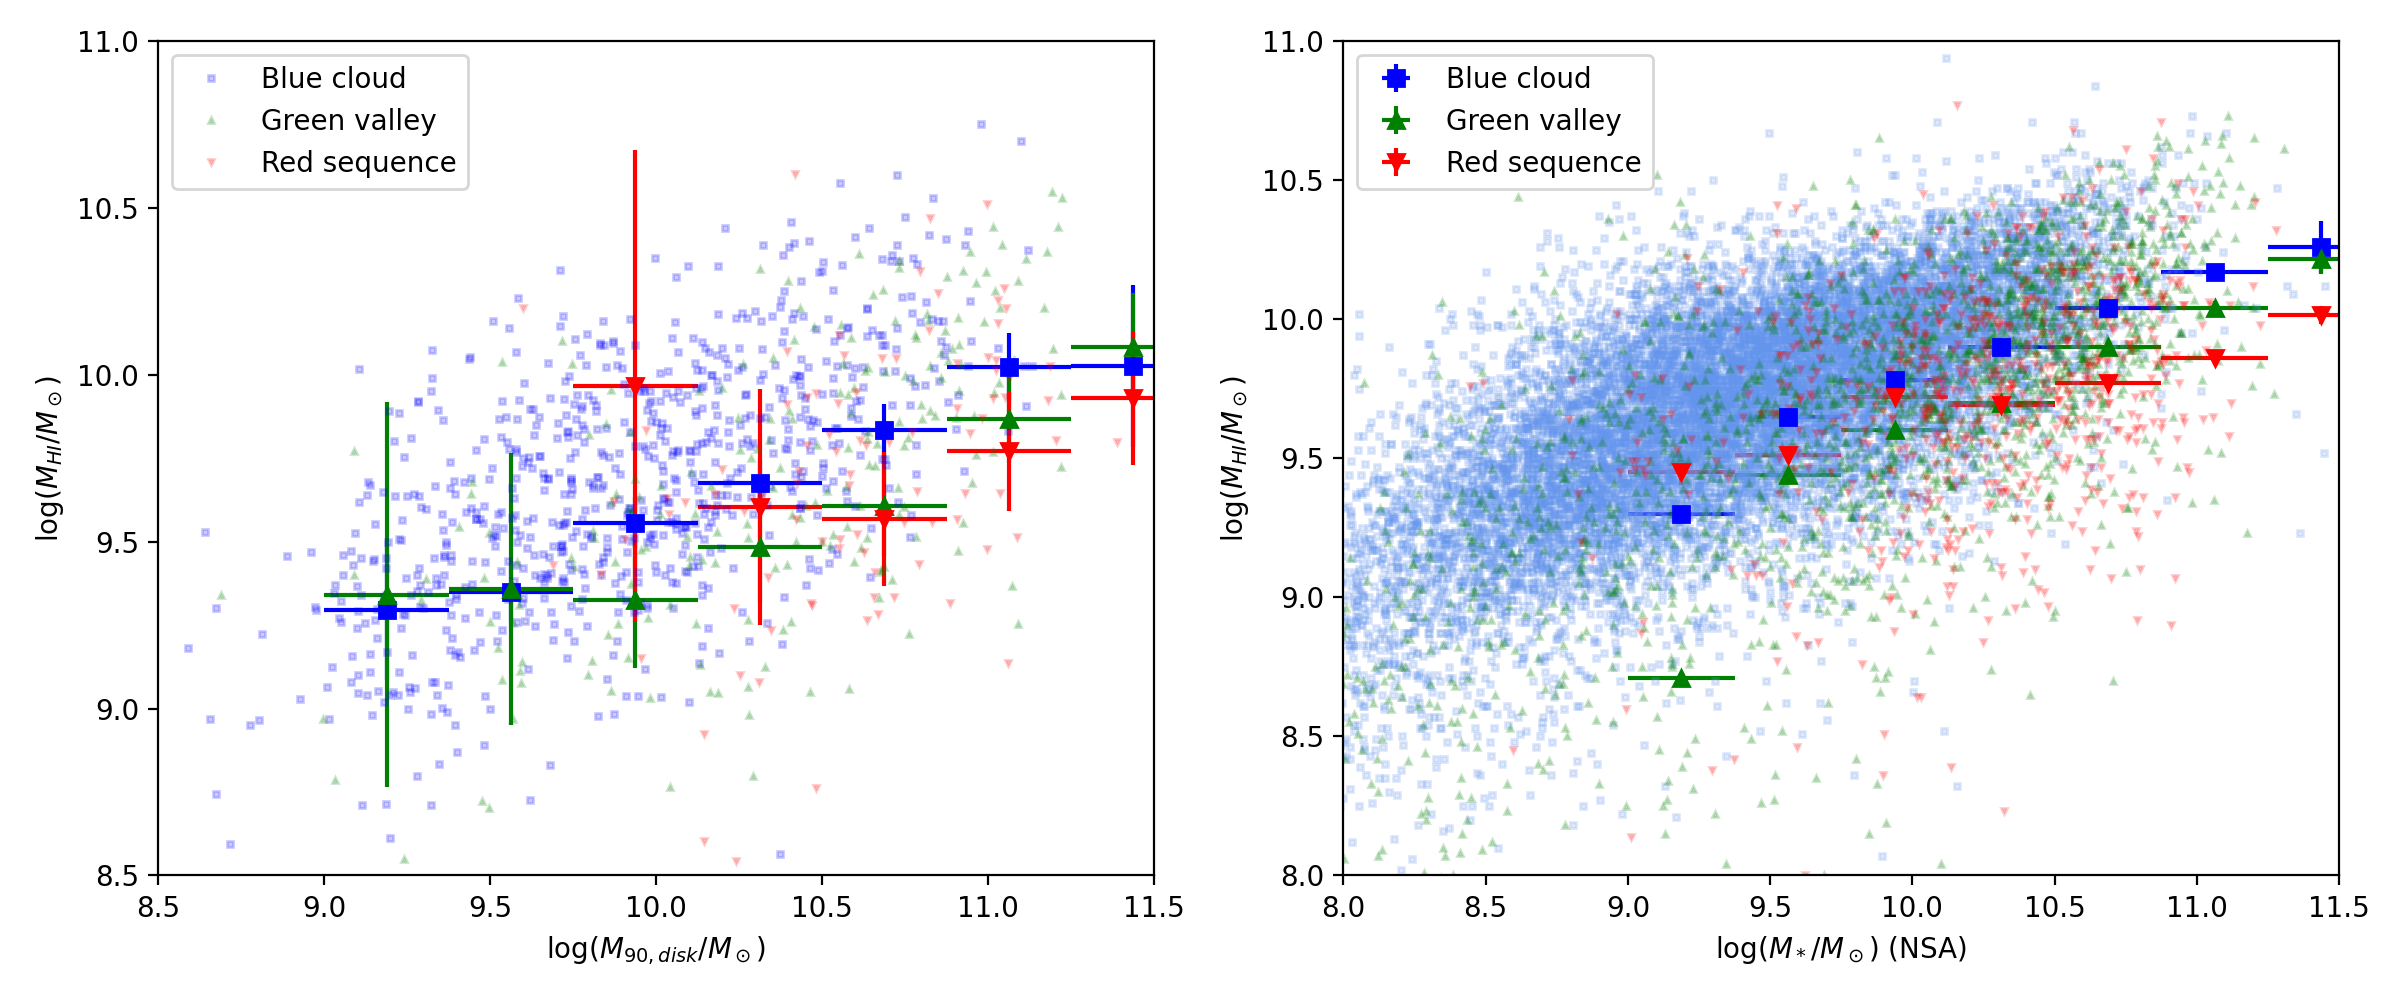

In [36]:
plt.figure(figsize=(12,5))

################################################################################
# Stellar mass from stellar density map
#-------------------------------------------------------------------------------
plt.subplot(121)
plt.plot(BC_HI['M90_disk_map'], BC_HI['logHI'], 'bs', markersize=2, 
         alpha=0.2, label='Blue cloud')
plt.plot(GV_HI['M90_disk_map'], GV_HI['logHI'], 'g^', markersize=2, 
         alpha=0.2, label='Green valley')
plt.plot(RS_HI['M90_disk_map'], RS_HI['logHI'], 'rv', markersize=2, 
         alpha=0.2, label='Red sequence')

plt.errorbar(Mdisk_bins + 0.5*Mdisk_bin_width, BC_HI_medians, 
             xerr=0.5*Mdisk_bin_width, yerr=BC_HI_errs, 
             c='b', fmt='s')
plt.errorbar(Mdisk_bins + 0.5*Mdisk_bin_width, GV_HI_medians, 
             xerr=0.5*Mdisk_bin_width, yerr=GV_HI_errs, 
             c='g', fmt='^')
plt.errorbar(Mdisk_bins + 0.5*Mdisk_bin_width, RS_HI_medians, 
             xerr=0.5*Mdisk_bin_width, yerr=RS_HI_errs, 
             c='r', fmt='v')

plt.xlabel('log($M_{90, disk}/M_\odot$)')
plt.ylabel('log($M_{HI}/M_\odot$)')

plt.xlim([8.5,11.5])
plt.ylim([8.5,11])

plt.legend()
################################################################################


################################################################################
# SDSS DR7
#-------------------------------------------------------------------------------
plt.subplot(122)
plt.plot(np.log10(kias_BC['Mstar_NSA']), kias_BC['HImass'], 's', 
         color='CornflowerBlue', markersize=2, alpha=0.2)
plt.plot(np.log10(kias_GV['Mstar_NSA']), kias_GV['HImass'], 'g^', markersize=2, 
         alpha=0.2)
plt.plot(np.log10(kias_RS['Mstar_NSA']), kias_RS['HImass'], 'rv', markersize=2, 
         alpha=0.2)

plt.errorbar(Mdisk_bins + 0.5*Mdisk_bin_width, kias_BC_NSA_HI_medians, 
             xerr=0.5*Mdisk_bin_width, yerr=kias_BC_NSA_HI_errs, 
             c='b', fmt='s', label='Blue cloud')
plt.errorbar(Mdisk_bins + 0.5*Mdisk_bin_width, kias_GV_NSA_HI_medians, 
             xerr=0.5*Mdisk_bin_width, yerr=kias_GV_NSA_HI_errs, 
             c='g', fmt='^', label='Green valley')
plt.errorbar(Mdisk_bins + 0.5*Mdisk_bin_width, kias_RS_NSA_HI_medians, 
             xerr=0.5*Mdisk_bin_width, yerr=kias_RS_NSA_HI_errs, 
             c='r', fmt='v', label='Red sequence')

plt.xlabel('log($M_*/M_\odot$) (NSA)')
plt.ylabel('log($M_{HI}/M_\odot$)')

plt.xlim([8,11.5])
plt.ylim([8,11])

plt.legend()
################################################################################

plt.tight_layout();

# Relationship between $M_{vis}$ and $M_{90}$

In [37]:
BC_Mvis_medians, BC_Mvis_errs = bin_median(BC_HI, 'M90_vis', Mdisk_bins, 'M90_map')
GV_Mvis_medians, GV_Mvis_errs = bin_median(GV_HI, 'M90_vis', Mdisk_bins, 'M90_map')
RS_Mvis_medians, RS_Mvis_errs = bin_median(RS_HI, 'M90_vis', Mdisk_bins, 'M90_map')

/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
<ipython-input-31-c68f859239fb>:58: RuntimeWarning: divide by zero encountered in double_scalars
  binned_err[i] = 1/np.sqrt(sum(gal_in_bin))


In [38]:
plt.figure()

plt.plot(BC_HI['M90_vis'], BC_HI['M90_map'], 
         'bs', markersize=2, alpha=0.2, label='Blue cloud')
plt.plot(GV_HI['M90_vis'], GV_HI['M90_map'], 
         'g^', markersize=2, alpha=0.2, label='Green valley')
plt.plot(RS_HI['M90_vis'], RS_HI['M90_map'], 
         'rv', markersize=2, alpha=0.2, label='Red sequence')

plt.errorbar(Mdisk_bins + 0.5*Mdisk_bin_width, BC_Mvis_medians, 
             xerr=0.5*Mdisk_bin_width, yerr=BC_Mvis_errs, 
             c='b', fmt='s')
plt.errorbar(Mdisk_bins + 0.5*Mdisk_bin_width, GV_Mvis_medians, 
             xerr=0.5*Mdisk_bin_width, yerr=GV_Mvis_errs, 
             c='g', fmt='^')
plt.errorbar(Mdisk_bins + 0.5*Mdisk_bin_width, RS_Mvis_medians, 
             xerr=0.5*Mdisk_bin_width, yerr=RS_Mvis_errs, 
             c='r', fmt='v')

plt.xlabel('log(($M_{90, disk} + M_{HI})/M_\odot$)')
plt.ylabel('log($M_{90}/M_\odot$)')

plt.xlim([9,12])
plt.ylim([9,13])

plt.legend();

<IPython.core.display.Javascript object>

# Distribution in mass ratios

In [39]:
def hist_norm(data, bins):
    '''
    Return the values to plot a normalized histogram.
    
    
    PARAMETERS
    ==========
    
    data : column of astropy table
        Data to be binned
        
    bins : ndarray of shape (n,)
        Bin edges
        
        
    RETURNS
    =======
    
    binned_data : ndarray of shape (n,)
        Number of objects in each bin, normalized by the total number of 
        objects in the sample
        
    binned_data_err : ndarray of shape (n,)
        Statistical uncertainty in the count in each bin.
    '''
    
    # Bin data
    counts,_ = np.histogram(data, bins=bins)
    
    # Normalize binned data
    binned_data = counts/len(data)
    
    # Calculate uncertainty in each bin
    binned_data_err = 1/(np.sqrt(counts)*len(data))
    
    return binned_data, binned_data_err

In [40]:
mass_bins = np.linspace(0,25,101)
mass_bin_width = mass_bins[1] - mass_bins[0]

BC_M90Mdisk_binned, BC_M90Mdisk_err = hist_norm(BC['M90_Mdisk_ratio'], bins=mass_bins)
GV_M90Mdisk_binned, GV_M90Mdisk_err = hist_norm(GV['M90_Mdisk_ratio'], bins=mass_bins)
RS_M90Mdisk_binned, RS_M90Mdisk_err = hist_norm(RS['M90_Mdisk_ratio'], bins=mass_bins)

<ipython-input-39-0fefddb2a605>:34: RuntimeWarning: divide by zero encountered in true_divide
  binned_data_err = 1/(np.sqrt(counts)*len(data))


### $M_{90}/M_{90, \text{disk}}$

<IPython.core.display.Javascript object>


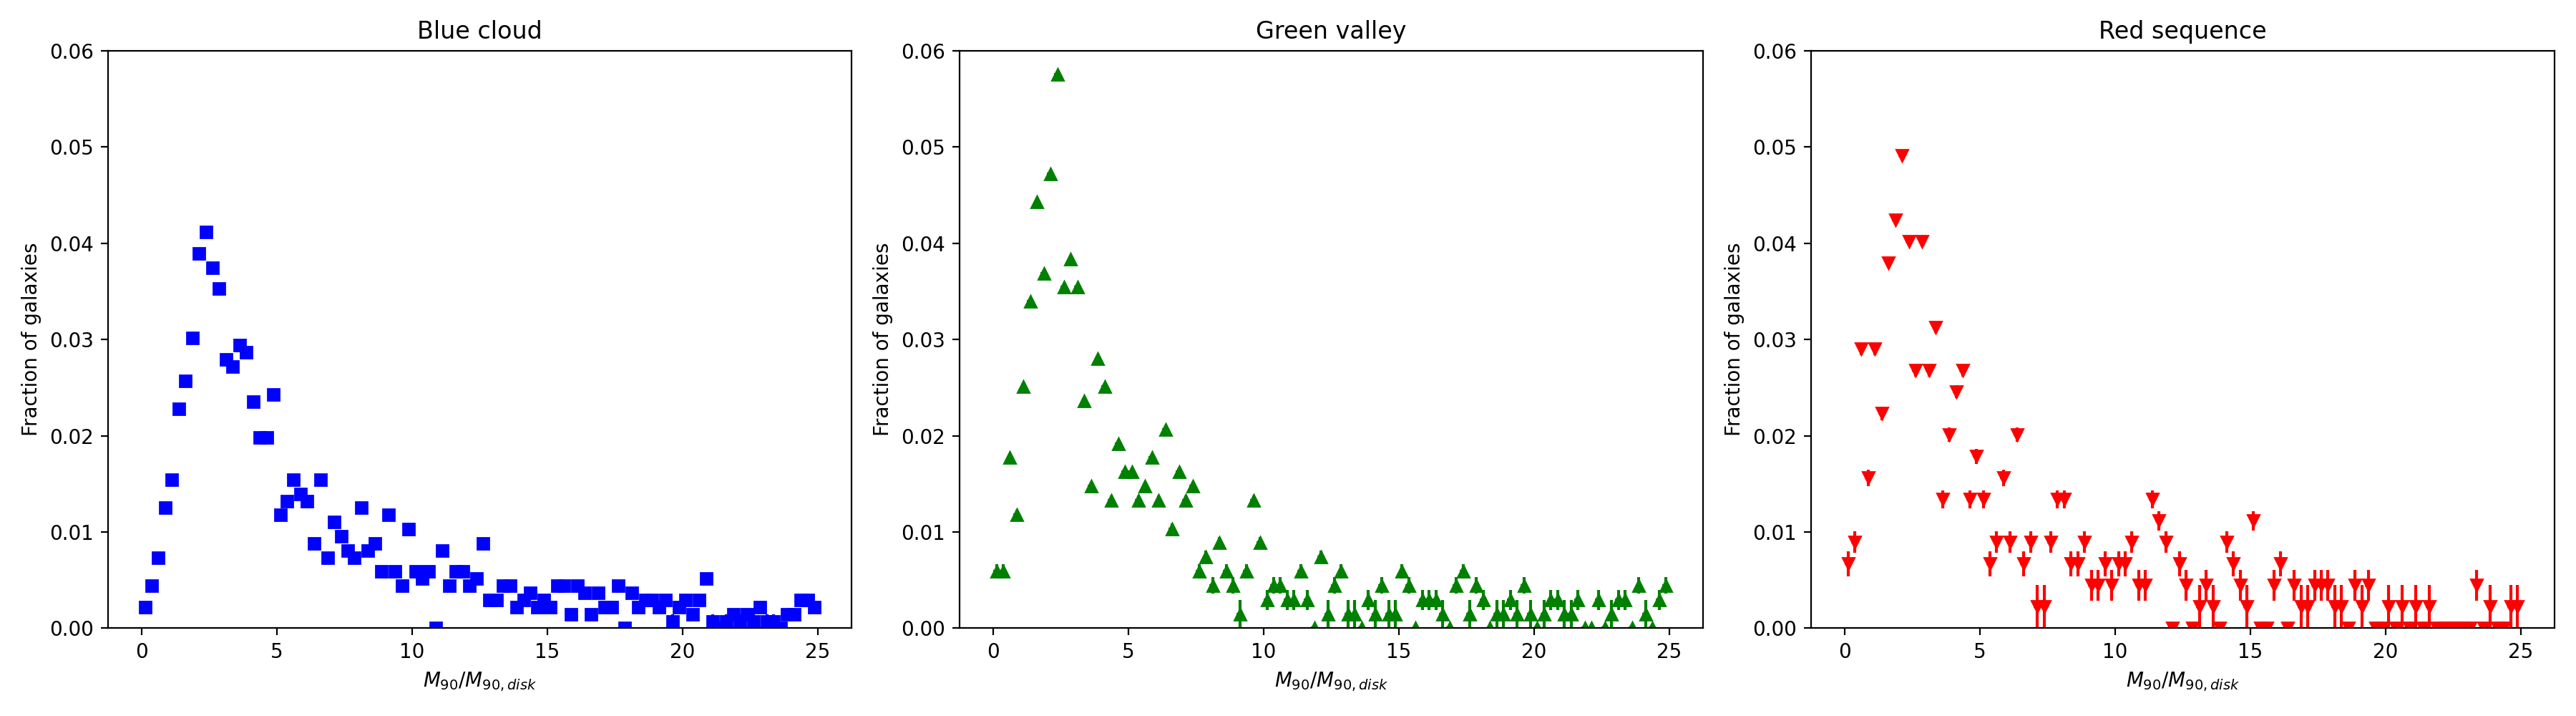

In [41]:
plt.figure(figsize=(18,5))

################################################################################
# Blue cloud
#-------------------------------------------------------------------------------
plt.subplot(131)

plt.errorbar(mass_bins[:-1] + 0.5*mass_bin_width, BC_M90Mdisk_binned, 
             xerr=0.5*mass_bin_width, yerr=BC_M90Mdisk_err, fmt='bs')

plt.ylim(0,0.06)

plt.xlabel('$M_{90}/M_{90, disk}$')
plt.ylabel('Fraction of galaxies')

plt.title('Blue cloud')
################################################################################


################################################################################
# Green valley
#-------------------------------------------------------------------------------
plt.subplot(132)

plt.errorbar(mass_bins[:-1] + 0.5*mass_bin_width, GV_M90Mdisk_binned, 
             xerr=0.5*mass_bin_width, yerr=GV_M90Mdisk_err, fmt='g^')

plt.ylim(0,0.06)

plt.xlabel('$M_{90}/M_{90, disk}$')
plt.ylabel('Fraction of galaxies')

plt.title('Green valley')
################################################################################


################################################################################
# Red sequence
#-------------------------------------------------------------------------------
plt.subplot(133)

plt.errorbar(mass_bins[:-1] + 0.5*mass_bin_width, RS_M90Mdisk_binned, 
             xerr=0.5*mass_bin_width, yerr=RS_M90Mdisk_err, fmt='rv')

plt.ylim(0,0.06)

plt.xlabel('$M_{90}/M_{90, disk}$')
plt.ylabel('Fraction of galaxies')

plt.title('Red sequence')
################################################################################

plt.tight_layout();

### $M_{90}/(M_{90, \text{disk}} + M_\text{HI})$

In [42]:
BC_M90Mvis_binned, BC_M90Mvis_err = hist_norm(BC_HI['M90_MdiskHI_ratio'], bins=mass_bins)
GV_M90Mvis_binned, GV_M90Mvis_err = hist_norm(GV_HI['M90_MdiskHI_ratio'], bins=mass_bins)
RS_M90Mvis_binned, RS_M90Mvis_err = hist_norm(RS_HI['M90_MdiskHI_ratio'], bins=mass_bins)

<ipython-input-39-0fefddb2a605>:34: RuntimeWarning: divide by zero encountered in true_divide
  binned_data_err = 1/(np.sqrt(counts)*len(data))


<IPython.core.display.Javascript object>


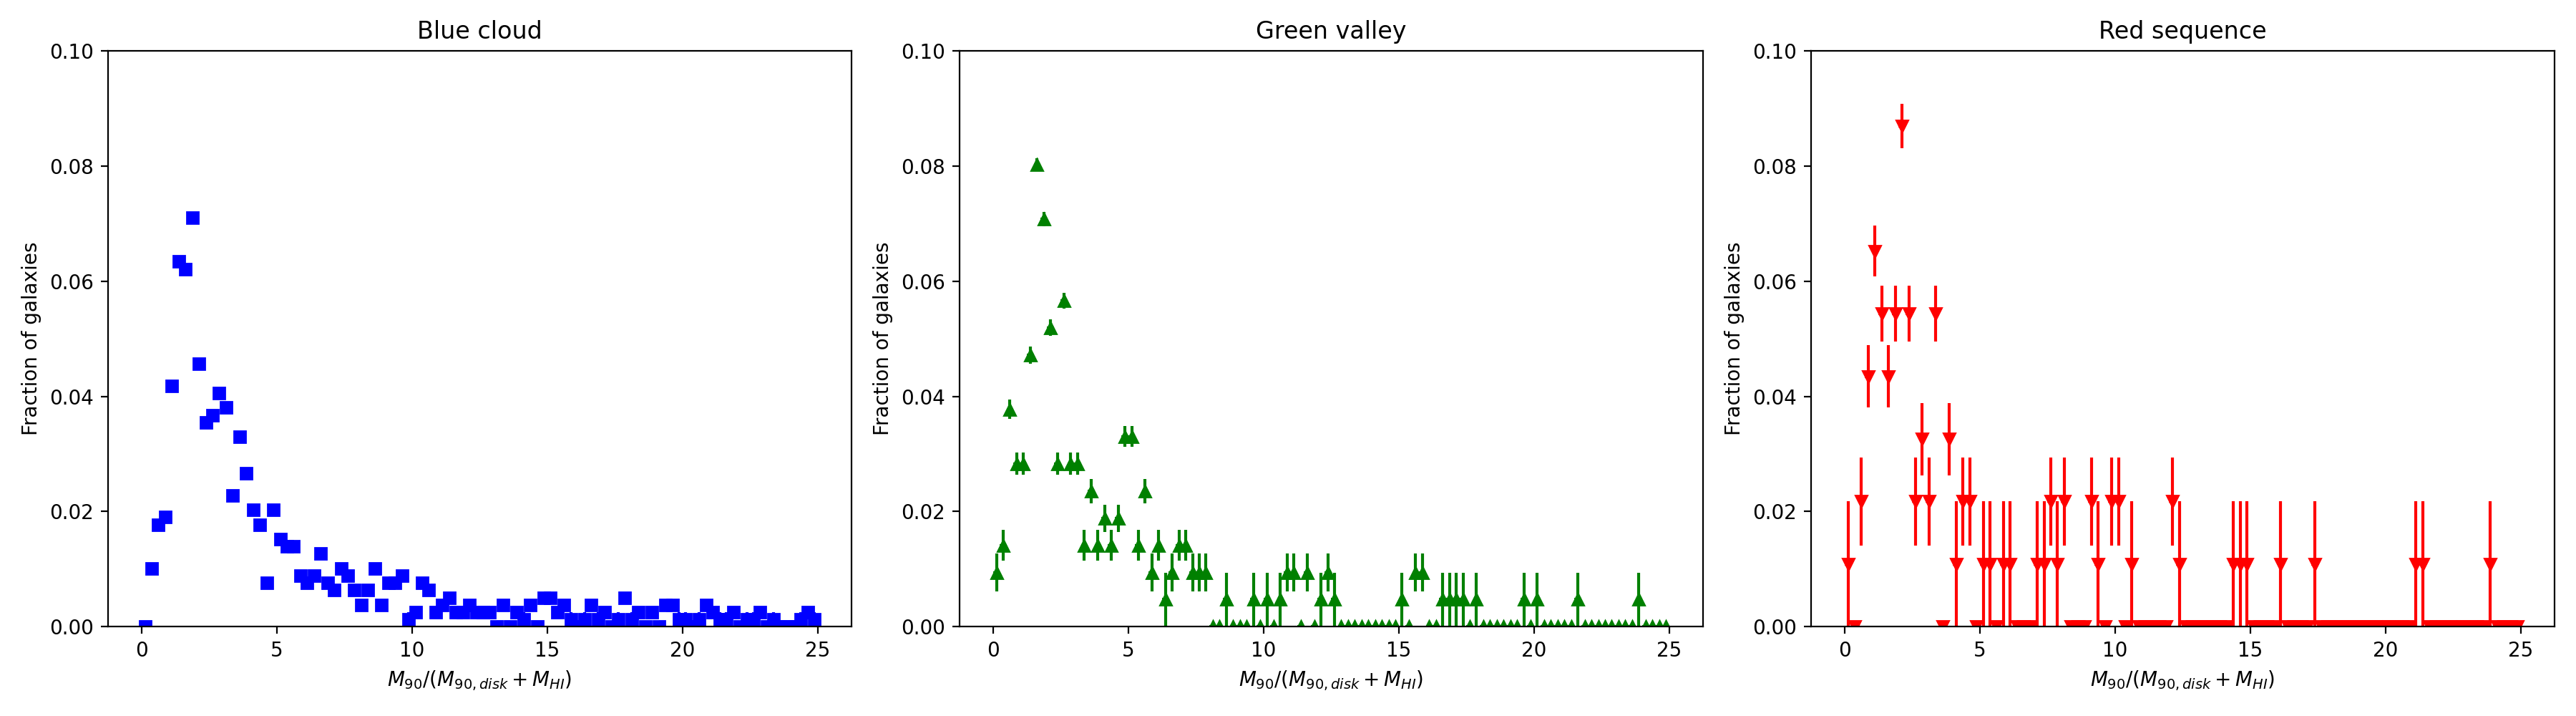

In [43]:
plt.figure(figsize=(18,5))

################################################################################
# Blue cloud
#-------------------------------------------------------------------------------
plt.subplot(131)

plt.errorbar(mass_bins[:-1] + 0.5*mass_bin_width, BC_M90Mvis_binned, 
             xerr=0.5*mass_bin_width, yerr=BC_M90Mvis_err, fmt='bs')

plt.ylim(0,0.1)

plt.xlabel('$M_{90}/(M_{90, disk} + M_{HI})$')
plt.ylabel('Fraction of galaxies')

plt.title('Blue cloud')
################################################################################


################################################################################
# Green valley
#-------------------------------------------------------------------------------
plt.subplot(132)

plt.errorbar(mass_bins[:-1] + 0.5*mass_bin_width, GV_M90Mvis_binned, 
             xerr=0.5*mass_bin_width, yerr=GV_M90Mvis_err, fmt='g^')

plt.ylim(0,0.1)

plt.xlabel('$M_{90}/(M_{90, disk} + M_{HI})$')
plt.ylabel('Fraction of galaxies')

plt.title('Green valley')
################################################################################


################################################################################
# Red sequence
#-------------------------------------------------------------------------------
plt.subplot(133)

plt.errorbar(mass_bins[:-1] + 0.5*mass_bin_width, RS_M90Mvis_binned, 
             xerr=0.5*mass_bin_width, yerr=RS_M90Mvis_err, fmt='rv')

plt.ylim(0,0.1)

plt.xlabel('$M_{90}/(M_{90, disk} + M_{HI})$')
plt.ylabel('Fraction of galaxies')

plt.title('Red sequence')
################################################################################

plt.tight_layout();

# Relationship between $M_r$ and the mass ratios

In [44]:
Mr_bins = np.linspace(-22.5, -17.5, 13)
Mr_bin_width = Mr_bins[1] - Mr_bins[0]

Mdisk_medians, Mdisk_errs = bin_median(good_galaxies, 'rabsmag', Mr_bins, 'M90_Mdisk_ratio')
MdiskHI_medians, MdiskHI_errs = bin_median(goodHI_galaxies, 'rabsmag', Mr_bins, 'M90_MdiskHI_ratio')

/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
<ipython-input-31-c68f859239fb>:58: RuntimeWarning: divide by zero encountered in double_scalars
  binned_err[i] = 1/np.sqrt(sum(gal_in_bin))


<IPython.core.display.Javascript object>


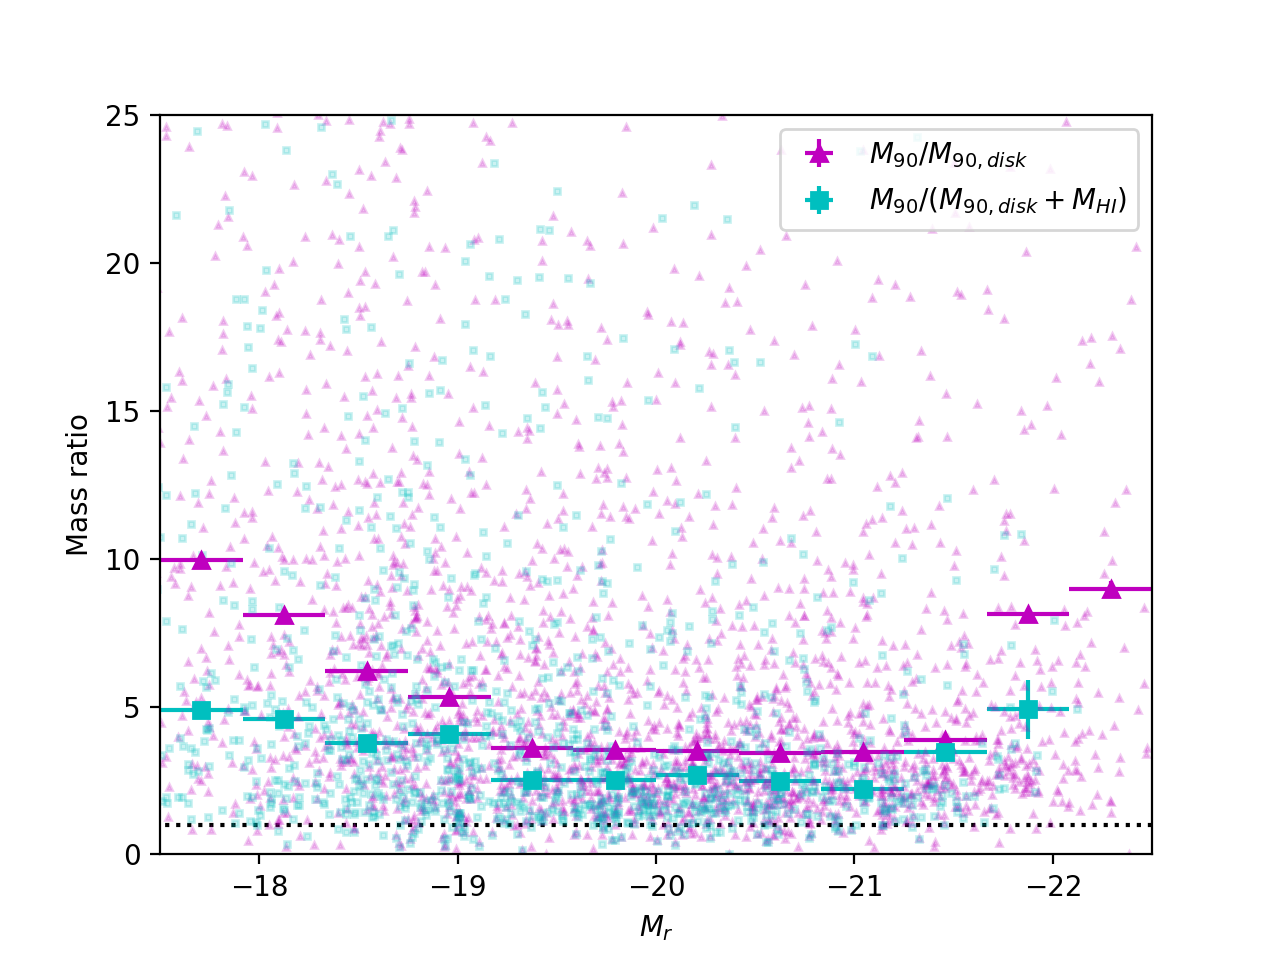

In [45]:
plt.figure()

################################################################################
# Stellar mass from stellar density map
#-------------------------------------------------------------------------------
plt.hlines(1, -22.5, -17.5, colors='k', linestyle=':')

plt.plot(good_galaxies['rabsmag'], good_galaxies['M90_Mdisk_ratio'], 
         'm^', markersize=2, alpha=0.2)
plt.plot(goodHI_galaxies['rabsmag'], goodHI_galaxies['M90_MdiskHI_ratio'], 
         'cs', markersize=2, alpha=0.2)

plt.errorbar(Mr_bins + 0.5*Mr_bin_width, Mdisk_medians, 
             xerr=0.5*Mr_bin_width, yerr=Mdisk_errs, 
             c='m', fmt='^', label='$M_{90}/M_{90, disk}$')
plt.errorbar(Mr_bins + 0.5*Mr_bin_width, MdiskHI_medians, 
             xerr=0.5*Mr_bin_width, yerr=MdiskHI_errs, 
             c='c', fmt='s', label='$M_{90}/(M_{90, disk} + M_{HI})$')

plt.xlabel('$M_r$')
plt.ylabel('Mass ratio')

plt.xlim([-17.5,-22.5])
plt.ylim([0,25])

plt.legend();
################################################################################

# Relationship between metallicity and mass ratios

In [46]:
Z_bins = np.linspace(8.5, 10.5, 13)
Z_bin_width = Z_bins[1] - Z_bins[0]

ZMdisk_medians, ZMdisk_errs = bin_median(good_galaxies, 'Z12logOH', Z_bins, 'M90_Mdisk_ratio')
ZMdiskHI_medians, ZMdiskHI_errs = bin_median(goodHI_galaxies, 'Z12logOH', Z_bins, 'M90_MdiskHI_ratio')

In [47]:
plt.figure()

################################################################################
# Stellar mass from stellar density map
#-------------------------------------------------------------------------------
plt.hlines(1, 8.5, 10.5, colors='k', linestyle=':')

plt.plot(good_galaxies['Z12logOH'], good_galaxies['M90_Mdisk_ratio'], 
         'm^', markersize=2, alpha=0.2)
plt.plot(goodHI_galaxies['Z12logOH'], goodHI_galaxies['M90_MdiskHI_ratio'], 
         'cs', markersize=2, alpha=0.2)

plt.errorbar(Z_bins + 0.5*Z_bin_width, ZMdisk_medians, 
             xerr=0.5*Z_bin_width, yerr=ZMdisk_errs, 
             c='m', fmt='^', label='$M_{90}/M_{90, disk}$')
plt.errorbar(Z_bins + 0.5*Z_bin_width, ZMdiskHI_medians, 
             xerr=0.5*Z_bin_width, yerr=ZMdiskHI_errs, 
             c='c', fmt='s', label='$M_{90}/(M_{90, disk} + M_{HI})$')

plt.xlabel('$12 + \log$(O/H)')
plt.ylabel('Mass ratio')

plt.xlim([8.5,10.5])
plt.ylim([0,25])

plt.legend();
################################################################################

<IPython.core.display.Javascript object>

# Relationship between $M_r$, metallicity, and mass ratio

In [48]:
def bin2D_median(data, bin1_quantity, bin2_quantity, bins1, bins2, median_quantity):
    '''
    Calculate the median value of the quantity median_quantity when the objects in 
    data are binned by bin_quanitity1 and bin_quantity2.
    
    
    PARAMETERS
    ==========
    
    data : astropy table
        Galaxy data
        
    bin1_quantity, bin2_quantity : string
        Name of columns in data by which to bin the data
        
    bins1, bins2 : ndarray of shape (n,)
        Arrays of bin edges (arrays do not need to be the same length)
        
    median_quantity : string
        Name of column in data for which to calculate the median once the data is 
        binned
        
        
    RETURNS
    =======
    
    binned_data : ndarray of shape (n,m)
        Median values of median_quantity for each bin of bin1_quantity and bin2_quantity
    '''
    
    if bin1_quantity in ['Mstar', 'NSA_Mstar']:
        bin1_indices = np.digitize(np.log10(data[bin1_quantity]), bins1)
    else:
        bin1_indices = np.digitize(data[bin1_quantity], bins1)
    
    if bin2_quantity in ['Mstar', 'NSA_Mstar']:
        bin2_indices = np.digitize(np.log10(data[bin2_quantity]), bins2)
    else:
        bin2_indices = np.digitize(data[bin2_quantity], bins2)
    
    n1_bins = len(bins1)
    n2_bins = len(bins2)
    
    binned_median = np.zeros((n1_bins, n2_bins))
    
    for i in range(n1_bins):
        for j in range(n2_bins):
            # Find galaxies in this bin
            gal_in_bin = np.logical_and(bin1_indices == i, bin2_indices == j)

            # Calculate median of galaxies in bin
            if median_quantity in ['Mstar', 'NSA_Mstar', 'Mtot']:
                binned_median[i,j] = np.log10(np.median(data[median_quantity][gal_in_bin]))
            else:
                binned_median[i,j] = np.median(data[median_quantity][gal_in_bin])
        
    return binned_median

In [49]:
Mr_bins2d = np.linspace(-22.5, -17.5, 5)
Z_bins2d = np.linspace(8.5, 10.5, 5)

M90Mdisk_median = bin2D_median(good_galaxies, 
                               'rabsmag', 'Z12logOH', 
                               Mr_bins2d, Z_bins2d, 
                               'M90_Mdisk_ratio')

M90MHI_median = bin2D_median(goodHI_galaxies, 
                             'rabsmag', 'Z12logOH', 
                             Mr_bins2d, Z_bins2d, 
                             'M90_MdiskHI_ratio')

/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3370: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


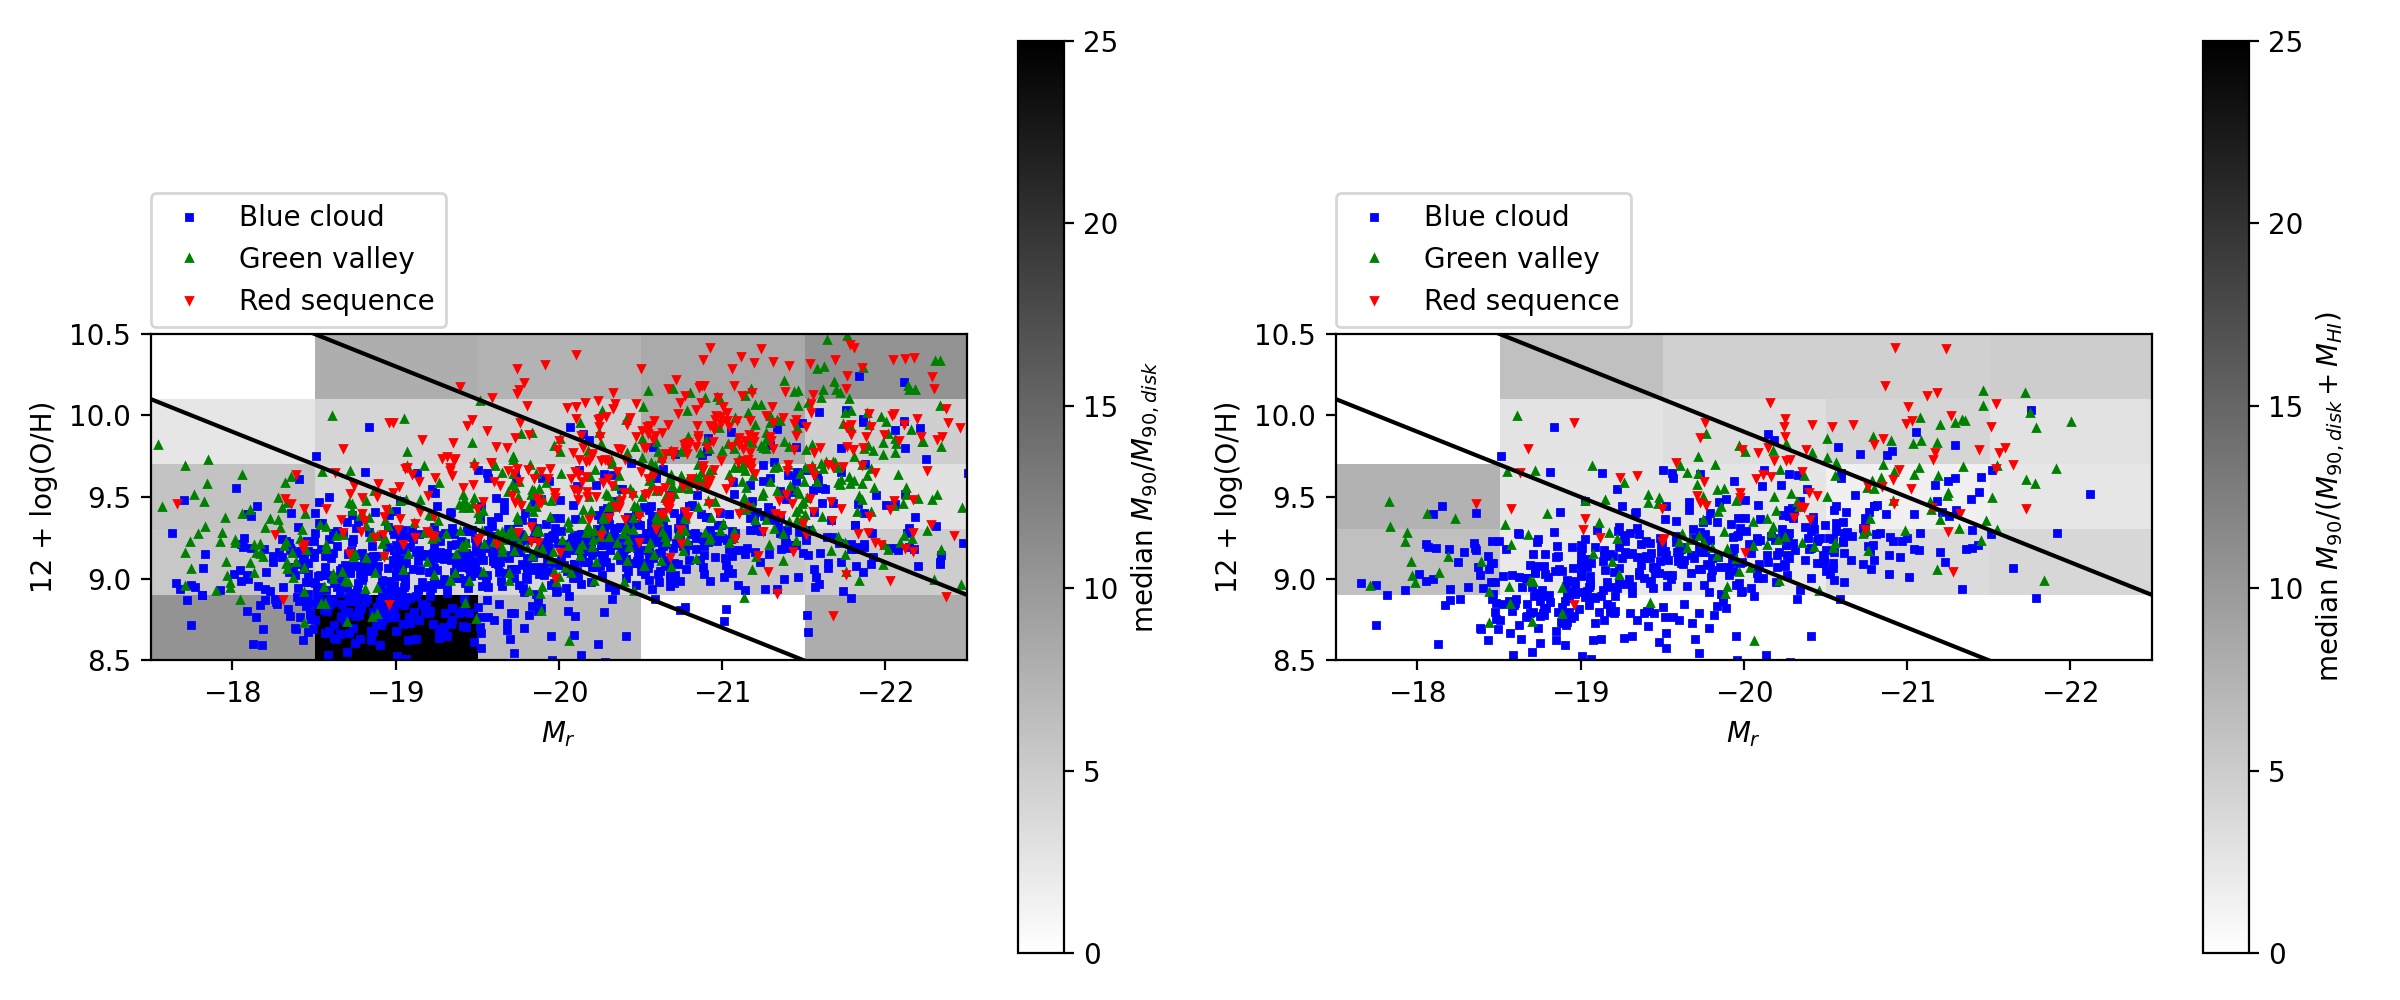

In [51]:
plt.figure(figsize=(12,5))

################################################################################
# Mtot/M* with MaNGA stellar mass
#-------------------------------------------------------------------------------
plt.subplot(121)

plt.imshow(M90Mdisk_median, cmap='gray_r', vmin=0, vmax=25,
           extent=(Mr_bins2d[0], Mr_bins2d[-1], Z_bins2d[-1], Z_bins2d[0]))

plt.plot(BC['rabsmag'], BC['Z12logOH'], 'bs', markersize=2, label='Blue cloud')
plt.plot(GV['rabsmag'], GV['Z12logOH'], 'g^', markersize=2, label='Green valley')
plt.plot(RS['rabsmag'], RS['Z12logOH'], 'rv', markersize=2, label='Red sequence')

Mr = np.linspace(-23,-17,5)
plt.plot(Mr, 0.4*Mr + 17.9, 'k')
plt.plot(Mr, 0.4*Mr + 17.1, 'k')

plt.xlabel('$M_r$')
plt.ylabel('12 + log(O/H)')

cbar = plt.colorbar()
cbar.ax.set_ylabel('median $M_{90}/M_{90, disk}$')

plt.xlim(Mr_bins2d[-1], Mr_bins2d[0])
plt.ylim(Z_bins2d[0], Z_bins2d[-1])

plt.legend(bbox_to_anchor=(0,1.02,1,0.102), loc='lower left', ncol=1, borderaxespad=0)
################################################################################


################################################################################
# Mtot/(M* + MHI) with MaNGA stellar mass
#-------------------------------------------------------------------------------
plt.subplot(122)

plt.imshow(M90MHI_median, cmap='gray_r', vmin=0, vmax=25,
           extent=(Mr_bins2d[0], Mr_bins2d[-1], Z_bins2d[-1], Z_bins2d[0]))

plt.plot(BC_HI['rabsmag'], BC_HI['Z12logOH'], 'bs', markersize=2, label='Blue cloud')
plt.plot(GV_HI['rabsmag'], GV_HI['Z12logOH'], 'g^', markersize=2, label='Green valley')
plt.plot(RS_HI['rabsmag'], RS_HI['Z12logOH'], 'rv', markersize=2, label='Red sequence')

plt.plot(Mr, 0.4*Mr + 17.9, 'k')
plt.plot(Mr, 0.4*Mr + 17.1, 'k')

plt.xlabel('$M_r$')
plt.ylabel('12 + log(O/H)')

cbar = plt.colorbar()
cbar.ax.set_ylabel('median $M_{90}/(M_{90, disk} + M_{HI})$')

plt.xlim(Mr_bins2d[-1], Mr_bins2d[0])
plt.ylim(Z_bins2d[0], Z_bins2d[-1])

plt.legend(bbox_to_anchor=(0,1.02,1,0.102), loc='lower left', ncol=1, borderaxespad=0)
################################################################################

plt.tight_layout();

In [32]:
good_galaxies

<Table length=2739>
MaNGA_plate MaNGA_IFU NSA_plate NSA_fiberID ...   imc     aimc     cd  
   int64      int64     int64      int64    ... float64 float64 float64
----------- --------- --------- ----------- ... ------- ------- -------
      10001     12704       483         456 ...    -1.0    -1.0    -1.0
       8466      3704      1365         395 ...     2.0   23.49   0.023
       9033      1901      1048         290 ...     2.0  148.75   0.082
       8465      1901      1281         231 ...     1.0     1.0  -0.036
       8249      3702       899         202 ...     2.0   26.05  -0.088
       8247      6103      1200         480 ...     1.0     1.0  -0.046
       8462      3703      1276         149 ...     2.0  164.49   0.208
       9027      9101      1420         480 ...     2.0   30.93  -0.352
       8247     12705      1200         508 ...     2.0   34.28  -0.256
       9027     12703      1420         549 ...     2.0   95.42  -0.116
        ...       ...       ...         ... ...     ...     ...     ...
       9031      3704      1169         172 ...     1.0     1.0  -0.097
       9027     12702      1420         464 ...     2.0    56.5  -0.171
       9027      6104      1684         149 ...    -1.0    -1.0    -1.0
       9028      3702      1406         389 ...    -1.0    -1.0    -1.0
       8134     12704      3665         696 ...    -1.0    -1.0    -1.0
       9024     12704      1647         231 ...     2.0   18.17  -0.223
       8999      3704       876          42 ...     2.0   69.34   0.013
       8997      1901       879         420 ...     2.0   35.28  -0.188
       8486      1901       812         203 ...     2.0   19.27   0.005
       8133      6101      1865         625 ...     1.0     1.0  -0.095